# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [1]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

## 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [3]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

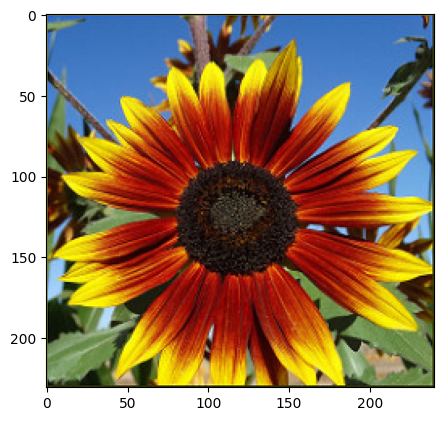

In [5]:
plt.figure(figsize=[5, 5])
plt.imshow(img_rgb)

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

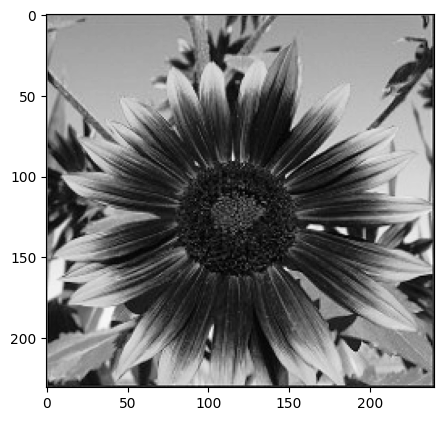

In [7]:
plt.figure(figsize=[5, 5])
plt.imshow(img_gray, cmap='Greys_r')

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [8]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

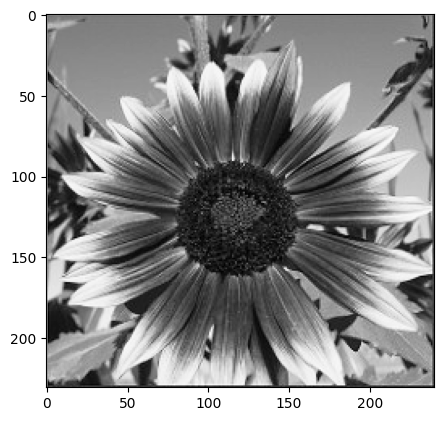

In [9]:
plt.figure(figsize=[5, 5])
plt.imshow(img_gray, cmap='Greys_r')

серое изображение - двумерный массив:

In [10]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB $\to$ gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [11]:
def convert_rgb_to_grayscale(img_rgb: np.ndarray):
    result = np.zeros(img_rgb.shape[:-1])
    result += (
        img_rgb[:, :, 0] * 0.29901 + \
        img_rgb[:, :, 1] * 0.58701 + \
        img_rgb[:, :, 2] * 0.11400
    ).round().astype(np.uint8)
        
    return result

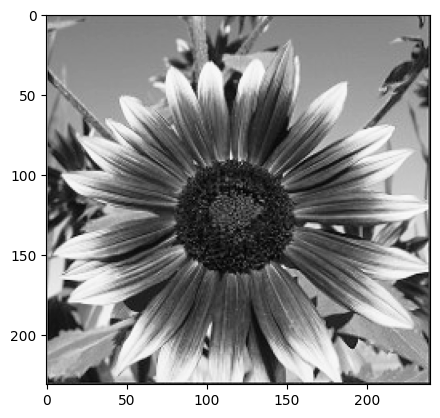

In [12]:
custom_grayscale = convert_rgb_to_grayscale(img_rgb)
plt.imshow(custom_grayscale, cmap="Greys_r")

In [13]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Почему бы не использовать при преобразовании в серое просто среднее арифметическое?

**Ответ:** потому что равные веса для цветов не учитывают реальное восприятие цвета (более выраженная чувствительность человеческого глаза к зелёному цвету).

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB $\to$ HSV

In [14]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

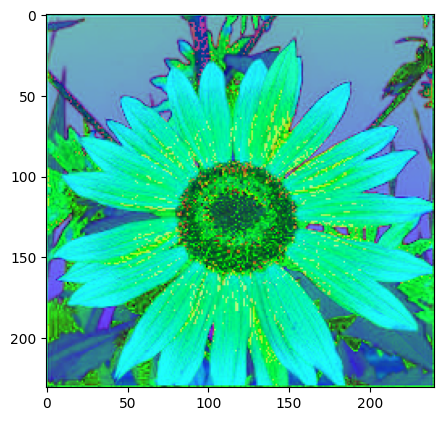

In [15]:
plt.figure(figsize=[5, 5])
plt.imshow(img_hsv)

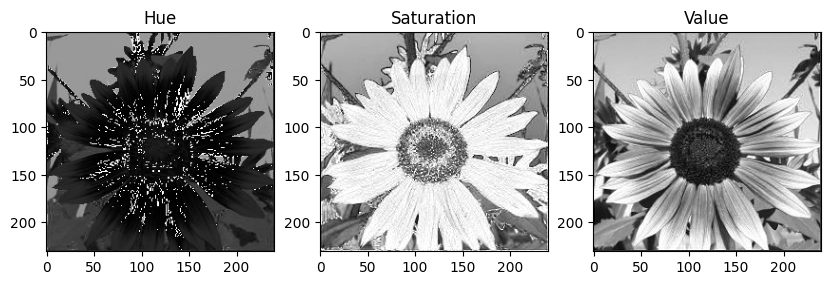

In [16]:
# Split the image into color channels
h, s, v = cv2.split(img_hsv)

plt.figure(figsize=[10, 30])
plt.subplot(131)
plt.imshow(h, cmap="gray")
plt.title('Hue')

plt.subplot(132)
plt.imshow(s, cmap="gray")
plt.title('Saturation')

plt.subplot(133)
plt.imshow(v, cmap="gray")
plt.title('Value')

# Display the plot
plt.show()


## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

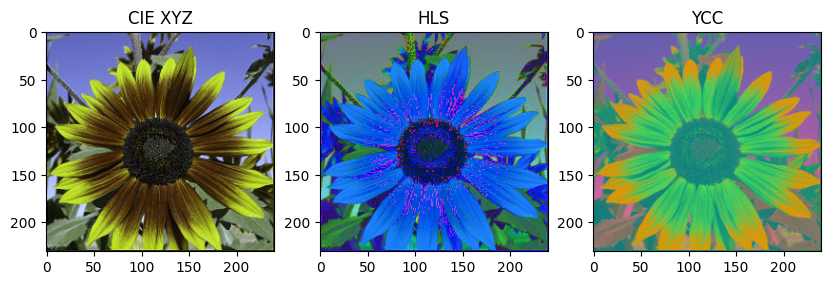

In [17]:
plt.figure(figsize=[10, 30])
plt.subplot(131)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2XYZ))
plt.title('CIE XYZ')

plt.subplot(132)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HLS))
plt.title('HLS')

plt.subplot(133)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb))
plt.title('YCC')

plt.show()

## Вопрос 2

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:** например, сегментация или детекция объектов по цвету.

## Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визализировать гистограмму:

In [18]:
def visualize_hist(hist):
    plt.figure(figsize=[20, 5])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [19]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [20]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

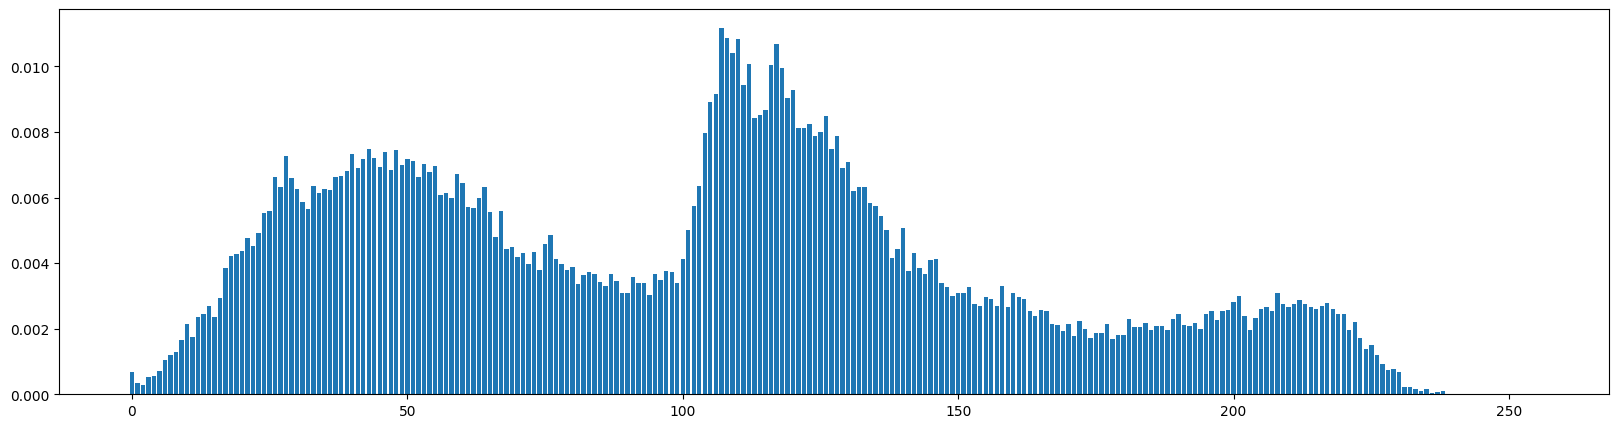

In [21]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [22]:
def compute_hist(img):
    if len(img.shape) != 2:
        raise ValueError("Incorrect shape, h*w expected")
    if np.min(img) < 0 or np.max(img) > 255:
        raise ValueError("Int8 img expected")
        
    return np.array([np.sum((img == val).astype(int)) for val in range(256)])

In [23]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

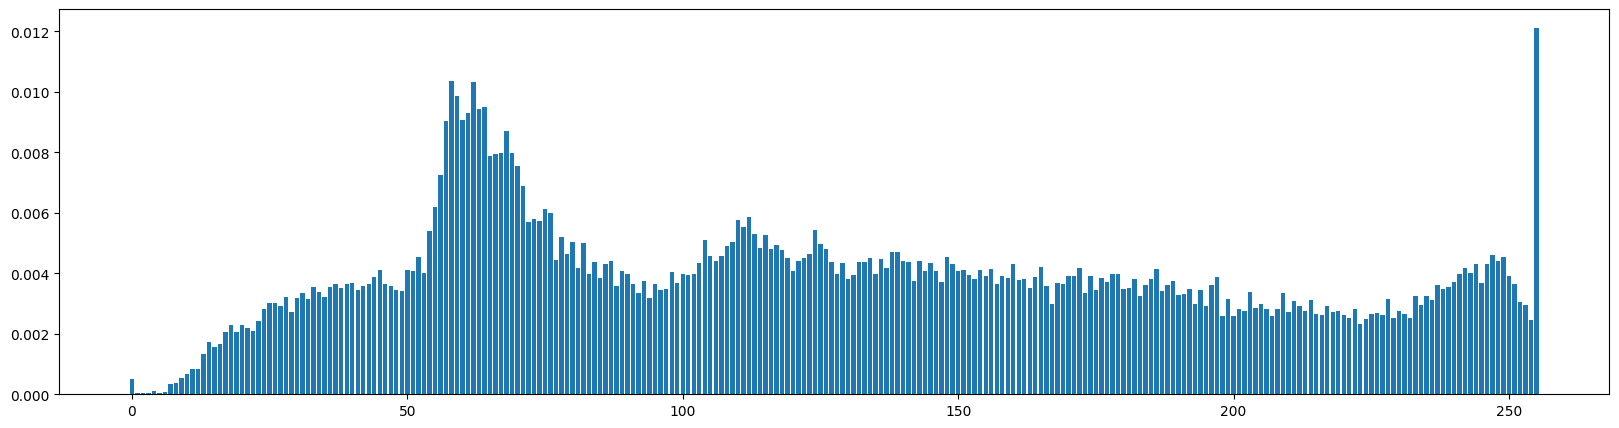

In [24]:
visualize_hist(hist_r)

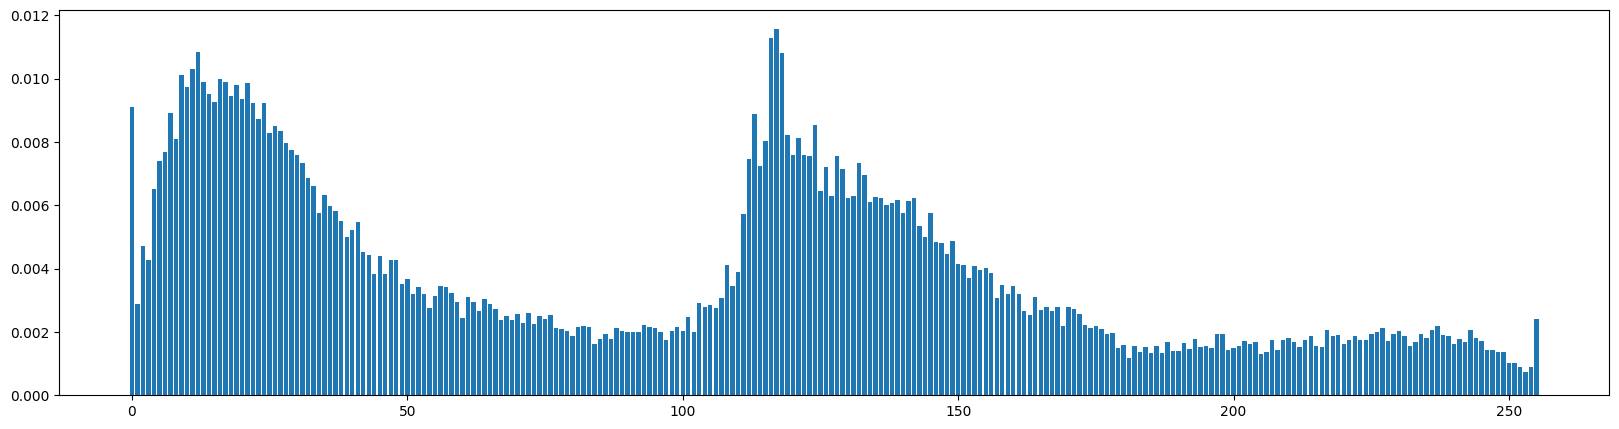

In [25]:
visualize_hist(hist_g)

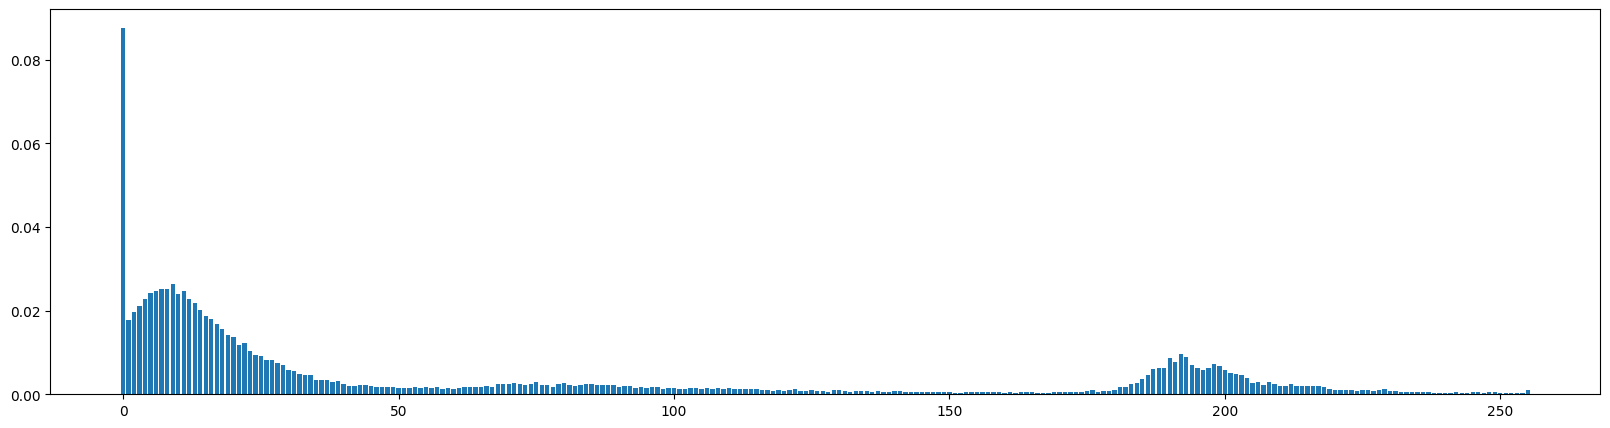

In [26]:
visualize_hist(hist_b)

In [27]:
assert((hist_gray == hist_cv).all())

## Вопрос 3

 Что можно сказать об изображении по его гистограмме?

**Ответ:** можно делать выводы о яркости изображения.

## Вопрос 4

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени?

**Ответ:** смена сцены, скорее всего, будет соответствовать резкому изменению гистограммы; смена кадров внутри сцены приведёт к плавному изменению гистограммы.

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

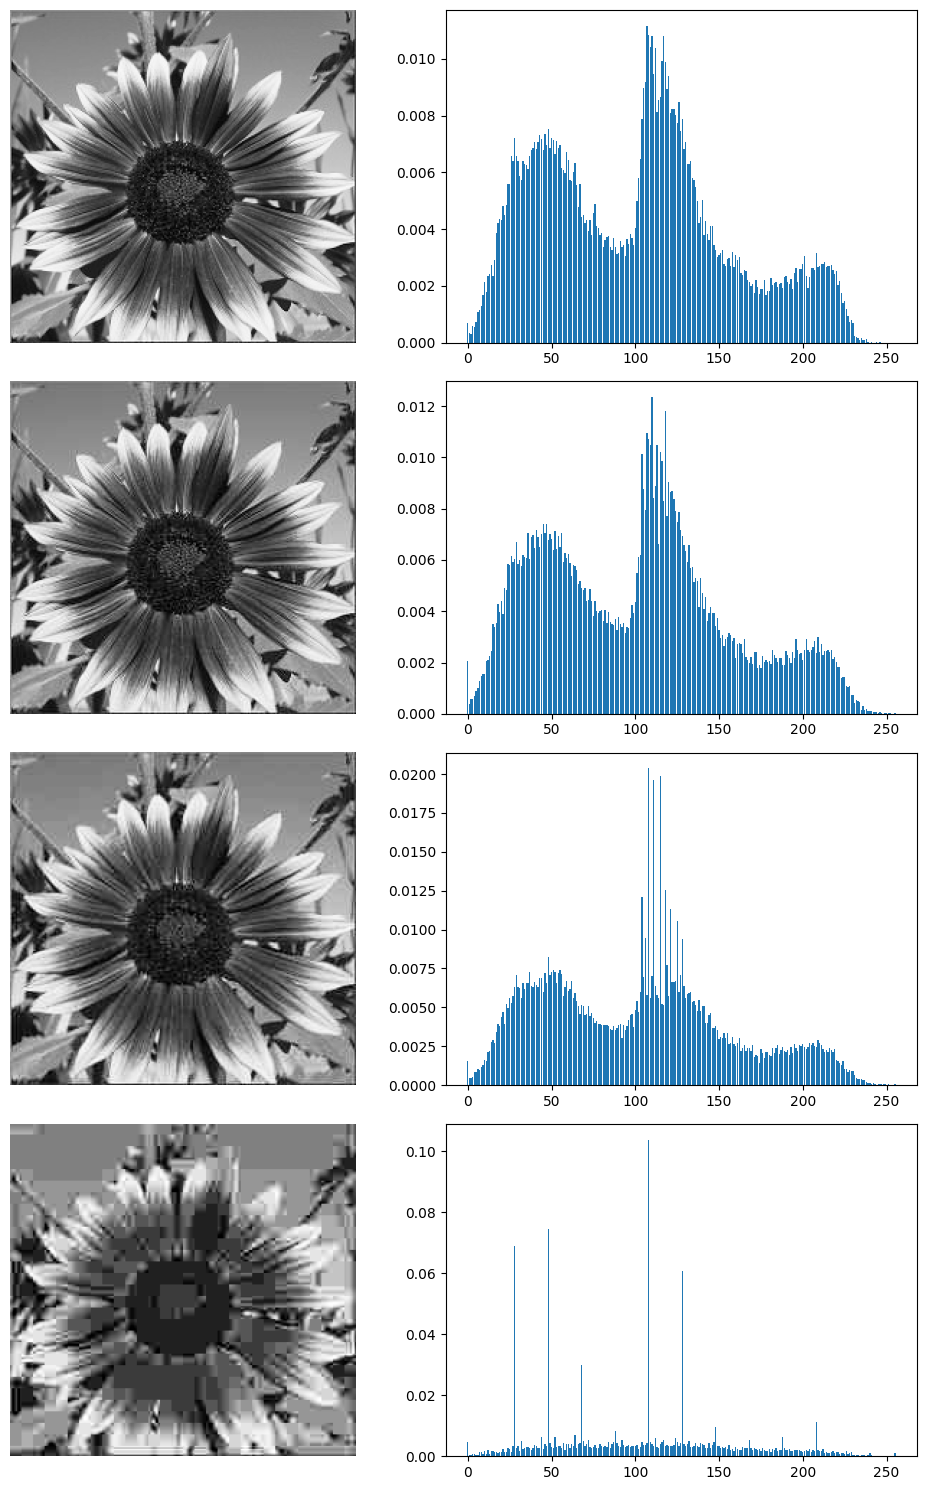

In [28]:
fig, axs = plt.subplots(4, 2, figsize=(10, 15))

for i, quality in enumerate([90, 60, 30, 5]):
    ok, img_buf = cv2.imencode('.jpg', img_gray, (cv2.IMWRITE_JPEG_QUALITY, quality))
    img_decoded = cv2.imdecode(img_buf, cv2.IMREAD_GRAYSCALE)
    axs[i, 0].imshow(img_decoded, cmap="Greys_r")
    axs[i, 0].axis('off')
    
    hist = compute_hist(img_decoded)
    axs[i, 1].bar(np.arange(len(hist)), hist / hist.sum())

plt.tight_layout()
plt.show()

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

Подсказка: вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

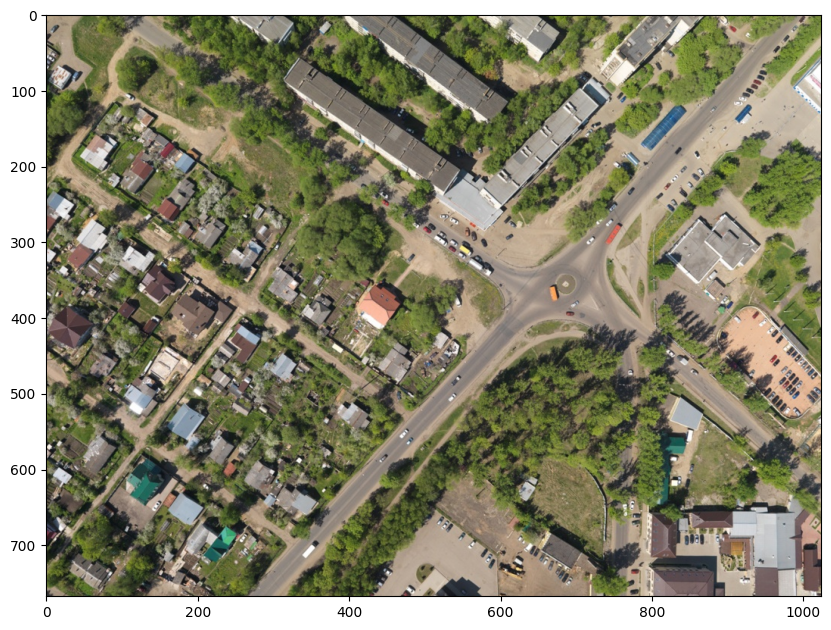

In [29]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image)

In [49]:
def mask_green_plants(rgb_img:np.ndarray):
    hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
    hsv_mask = (42 <= hsv_img[:, :, 1]).astype(np.int16)
    
    rgb_img = rgb_img.copy().astype(np.int16)
    
    gr_delta = rgb_img[:, :, 1] - rgb_img[:, :, 0]
    gr_mask = (gr_delta >= 0).astype(np.int16)
    
    gb_delta = rgb_img[:, :, 1] - rgb_img[:, :, 2]
    gb_mask = (gb_delta >= 0).astype(np.int16)

    # Удивительным образом этот фильтр играет решающее значение (а не дополняет hsv_mask, как планировалось)
    rgb_mask = np.multiply(gr_mask, gb_mask)
    
    return np.multiply(hsv_mask, rgb_mask)

mask = mask_green_plants(aerial_image)

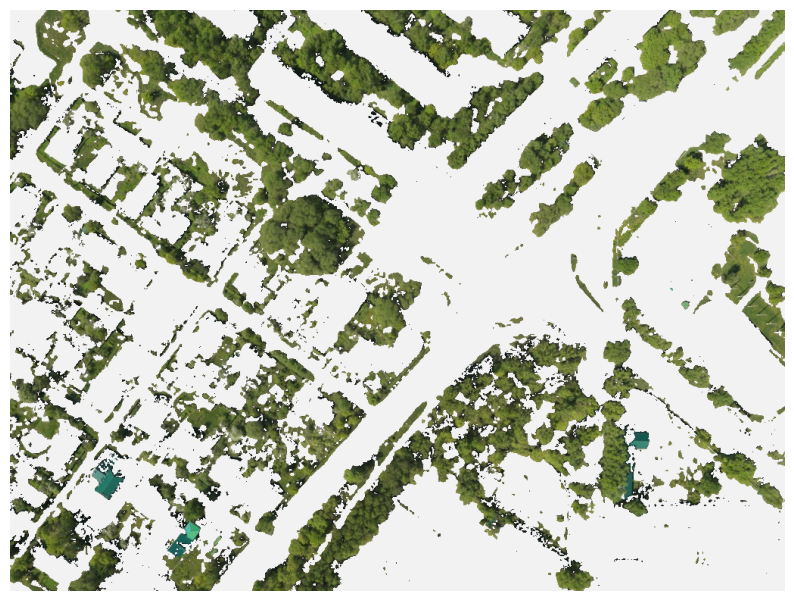

In [42]:
masked_image = aerial_image * np.expand_dims(mask, axis=2)
 
masked_image[np.all(masked_image == [0, 0, 0], axis=2)] = [242, 242, 242]

plt.figure(figsize=[10, 10])
plt.axis('off')
plt.imshow(masked_image)

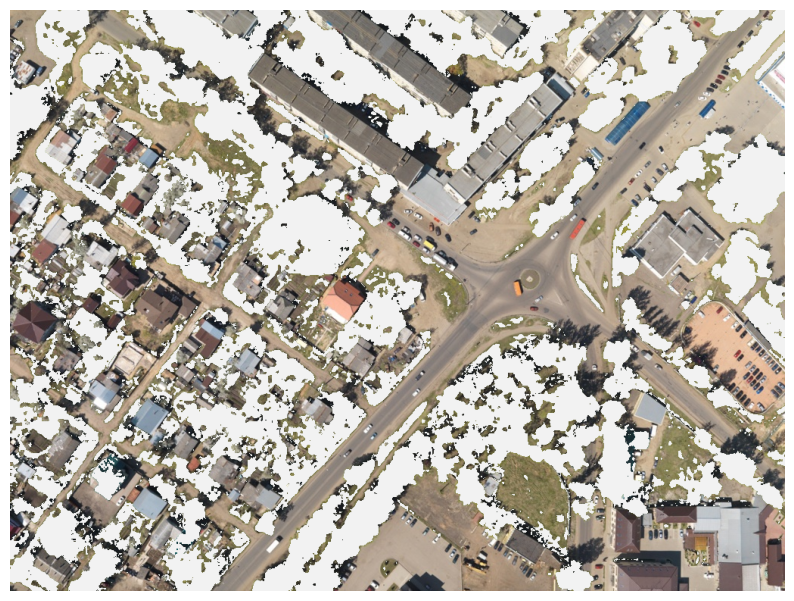

In [48]:
reversed_mask = np.ones(mask.shape).astype(np.int16) - mask
masked_image = aerial_image * np.expand_dims(reversed_mask, axis=2)

masked_image[np.all(masked_image == [0, 0, 0], axis=2)] = [242, 242, 242]

plt.figure(figsize=[10, 10])
plt.axis('off')
plt.imshow(masked_image)

In [32]:
S_picture = mask.shape[0] * mask.shape[1]
S_greens = mask.sum()

greens_percentage = S_greens / S_picture
print(f"Greens %: {greens_percentage * 100 :.3f}")

Greens %: 33.786


**Ответ:** доля зелёных составляет около 34%, причём погрешность получится определить только "на глаз" (по зелёным домикам) - около 5%.

# Упражнение 6: Интегральное изображение
Напомним, что интегральным изображением называется следующая функция:
$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$
С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [33]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)  # только для серых изображений

        self.img = img
        self.integral_img = self.__make_integral_img()

    def sum(self, x, y, w, h):
        x, y = y, x
        w, h = h, w
        
        if x + y == 0:
            return self.integral_img[w - 1, h - 1]
        
        A = 0 if x * y == 0 else self.integral_img[x - 1, y - 1]
        B = 0 if y == 0 else self.integral_img[x - 1 + w, y - 1]
        C = 0 if x == 0 else self.integral_img[x - 1, y- 1 + h]
        D = self.integral_img[x - 1 + w, y - 1 + h]
        
        return D - C - B + A
        
    def __make_integral_img(self):
        integral_img = np.zeros_like(self.img).astype(np.int64)
        for i in range(integral_img.shape[0]):
            for j in range(integral_img.shape[1]):
                A = 0 if i * j == 0 else integral_img[i - 1][j - 1]
                B = 0 if j == 0 else integral_img[i, j - 1]
                C = 0 if i == 0 else integral_img[i - 1, j]
                D = self.img[i, j]
                
                integral_img[i, j] = D + C + B - A
                
        return integral_img

In [34]:
I = IntegralImage(img_gray)

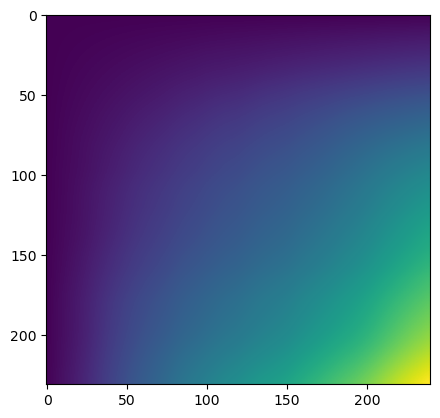

In [35]:
plt.imshow(I.integral_img)
plt.show() # красивое

In [36]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 5

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:** нагуглилось только про задачи

## Вопрос 6

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:** динамическое программирование.